In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(context='talk', style='darkgrid', palette='deep')

## Exploring How Profits Have Evolved Over Time

In [57]:
# Read in the fact table and date dimension table.
fact_table = pd.read_csv("data/preprocessed/fact.sale.csv")
date_dimension = pd.read_csv("data/preprocessed/dim.date.csv")

# Merge tables on invoice date.
fact_date = fact_table.merge(date_dimension, left_on="Invoice Date Key", right_on="Date")

# Create column calculating profit in millions.
fact_date["Profit (Millions)"] = fact_date["Profit"] / 1e6

# Calculate total profits by each month in the fiscal year.
profits_by_month = fact_date.groupby(
    ["Fiscal Year", "Month", "Fiscal Month Number"]
    )[
        ["Profit", "Profit (Millions)"]
    ].sum().reset_index().sort_values(["Fiscal Month Number"])

# Calculate total profits in each fiscal year.
profits_by_year = fact_date.groupby(
    "Fiscal Year"
    )[
        ["Profit", "Profit (Millions)"]
    ].sum().reset_index().sort_values(["Fiscal Year"])

### Total Profit (in Millions) Generated Each Fiscal Year

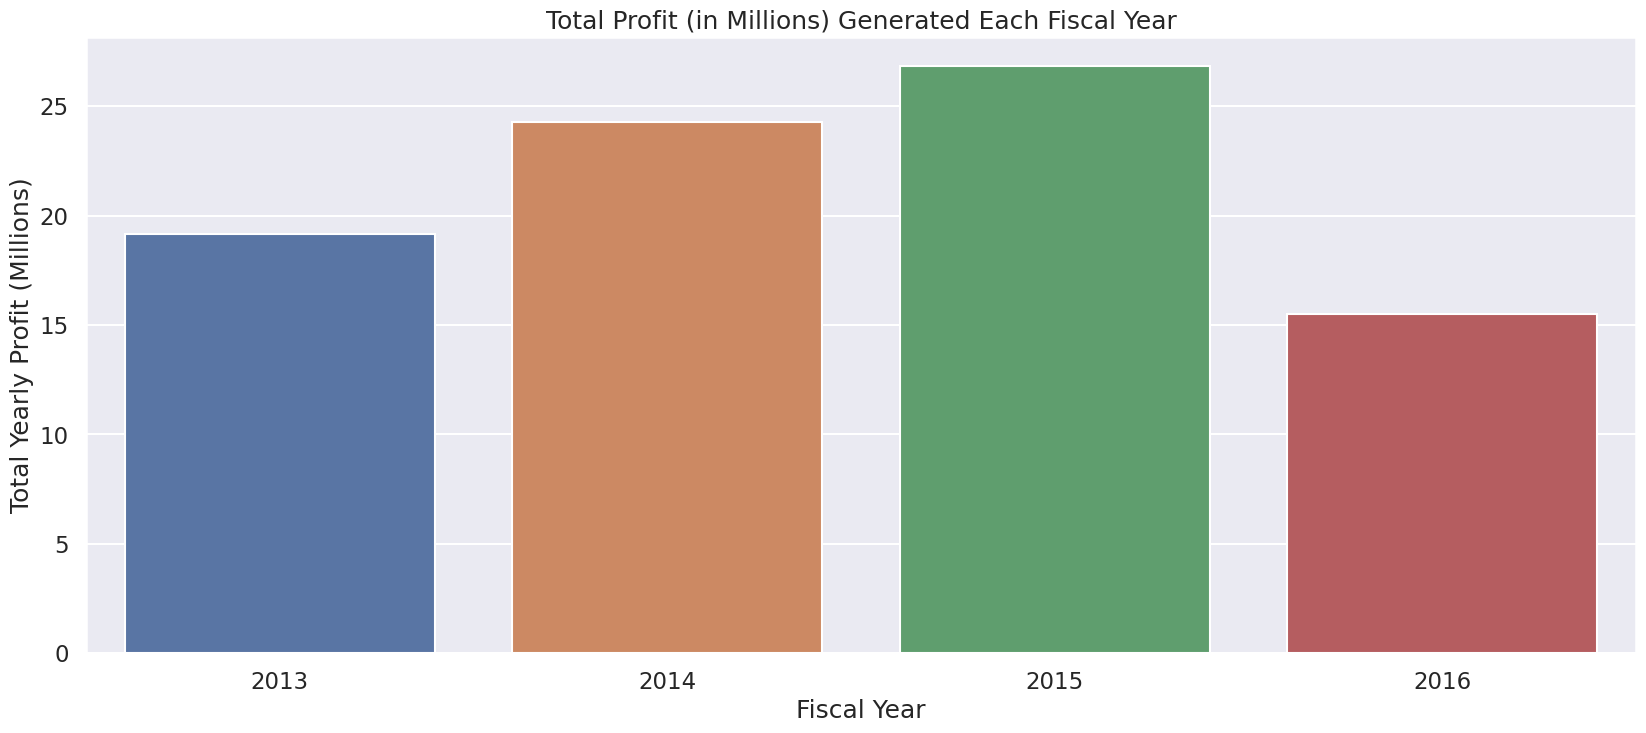

In [72]:
figure, ax = plt.subplots(
    figsize=(20,8)
)

sns.barplot(
    x="Fiscal Year",
    y="Profit (Millions)",
    data=profits_by_year,
    ax=ax,
)

plt.ylabel("Total Yearly Profit (Millions)")
plt.title("Total Profit (in Millions) Generated Each Fiscal Year");

### Total Monthly Profit (in Millions) By Fiscal Year

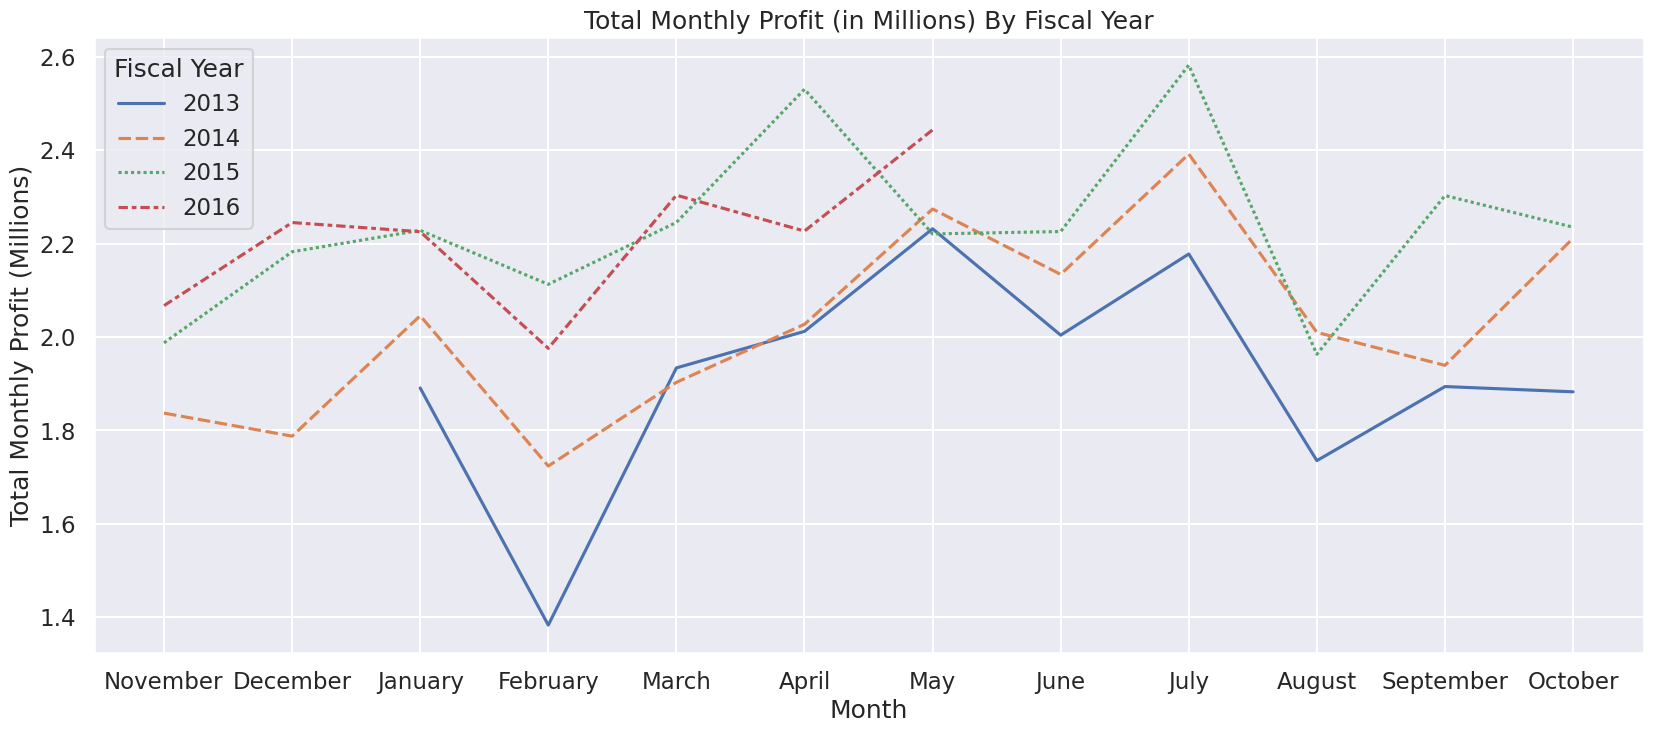

In [70]:
figure, ax = plt.subplots(
    figsize=(20,8)
)

sns.lineplot(
    x="Month",
    y="Profit (Millions)",
    data=profits_by_month,
    hue="Fiscal Year",
    style="Fiscal Year",
    palette="deep",
    ax=ax,
)
plt.ylabel("Total Monthly Profit (Millions)")
plt.title("Total Monthly Profit (in Millions) By Fiscal Year");

### Average Monthly Profit (in Millions) By Fiscal Year

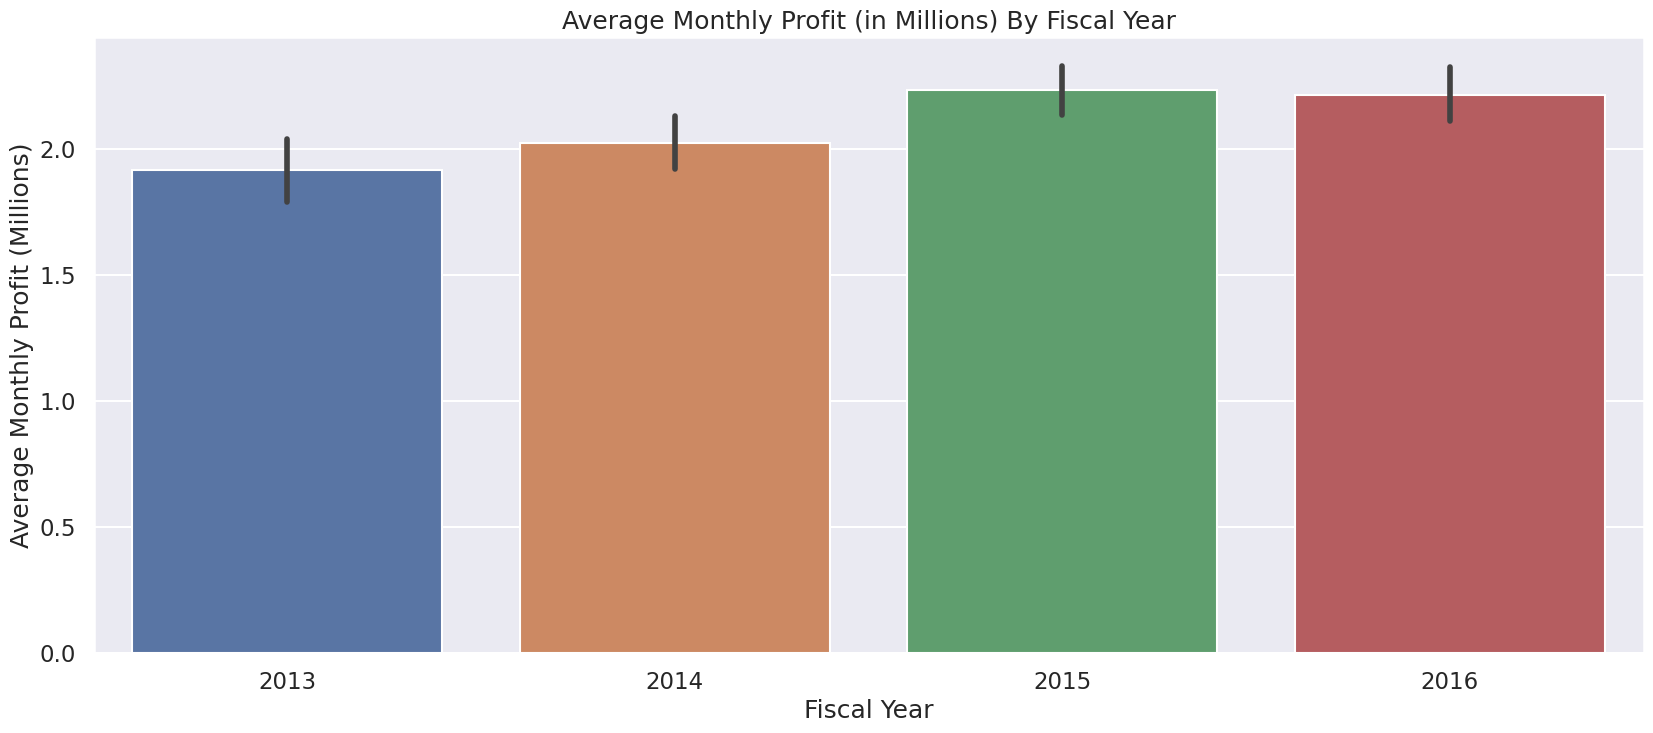

In [69]:
figure, ax = plt.subplots(
    figsize=(20,8)
)

sns.barplot(
    x="Fiscal Year",
    y="Profit (Millions)",
    data=profits_by_month,
    ax=ax,
)

plt.ylabel("Average Monthly Profit (Millions)")
plt.title("Average Monthly Profit (in Millions) By Fiscal Year");

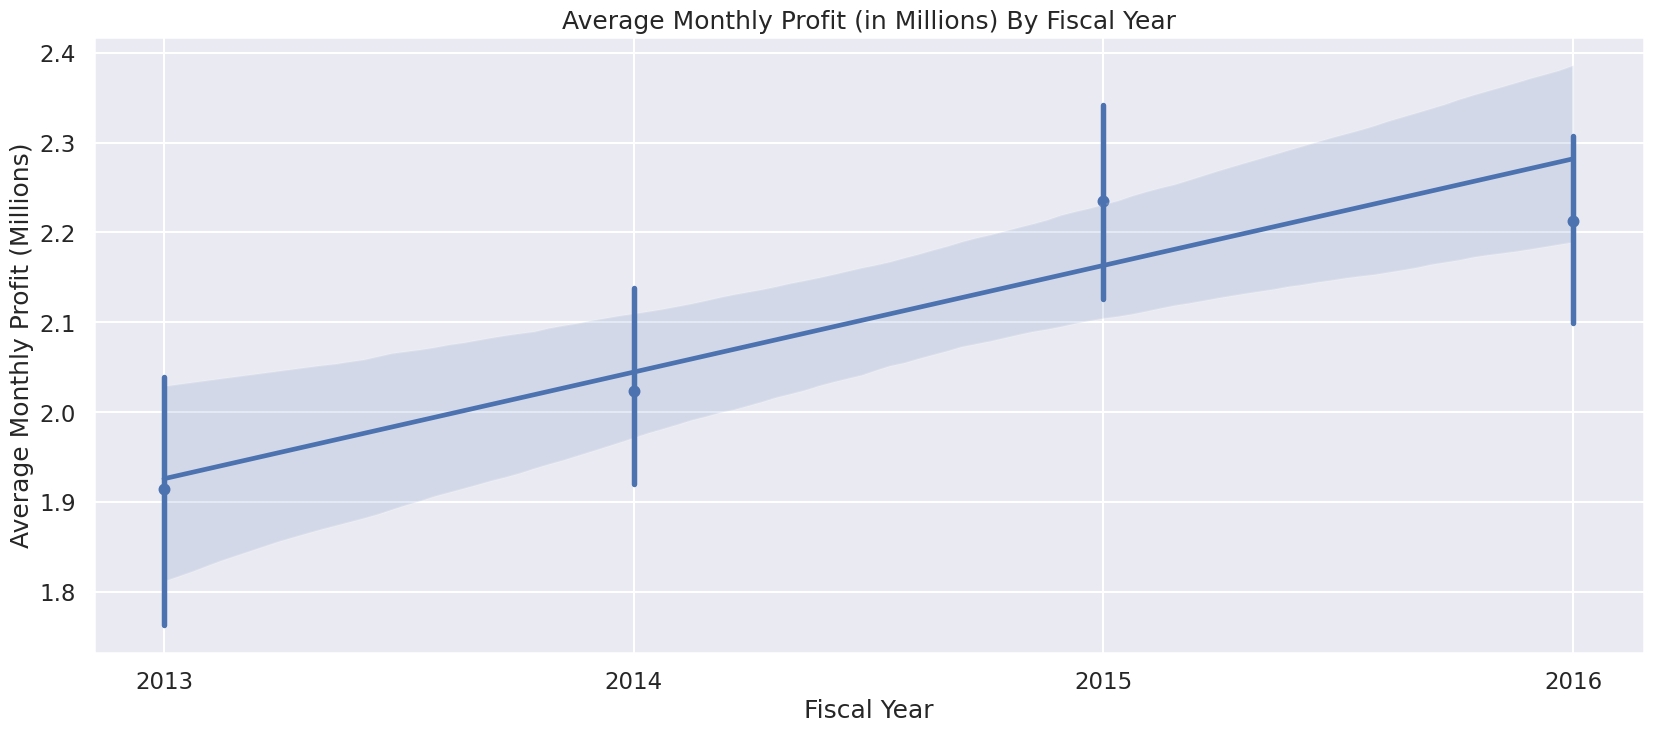

In [68]:
from  matplotlib.ticker import FuncFormatter

figure, ax = plt.subplots(
    figsize=(20,8)
)

sns.regplot(
    x="Fiscal Year",
    y="Profit (Millions)",
    data=profits_by_month,
    x_estimator=np.mean,
    ax=ax,
)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.xticks(profits_by_month["Fiscal Year"].unique())
plt.ylabel("Average Monthly Profit (Millions)")
plt.title("Average Monthly Profit (in Millions) By Fiscal Year");

### What is the Estimated Average Growth Rate in Profits?

In [91]:
from sklearn.linear_model import LinearRegression

x = profits_by_month["Fiscal Year"].values.reshape((-1, 1))
y = profits_by_month["Profit (Millions)"].values

model = LinearRegression().fit(x,y)

print(f"Estimated Average Growth Rate: ${int((model.coef_[0]*1000).round(-1))}K per month")
print(f"                               ${(model.coef_[0]*12).round(1)}M per year")

Estimated Average Growth Rate: $120K per month
                               $1.4M per year


In [112]:
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()\
    
display(results.summary())
print(f"Estimated Average Growth Rate: ${int((results.params[1]*1000).round(-1))}K (+- {(results.bse[1]*1000).round(-1)}K) per month")
print(f"                               ${(results.params[1]*12).round(1)}M (+- {(results.bse[1]*1000*12).round(1)}K) per year")




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.38
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           0.000346
Time:                        16:59:38   Log-Likelihood:                 8.8282
No. Observations:                  41   AIC:                            -13.66
Df Residuals:                      39   BIC:                            -10.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -236.8241     60.916     -3.888      0.000    -360.039    -113.609
x1             0.1186      0.030      3.922      0.000       0.057       0.180
==============================================================================
Omnibus:                        1.124   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.396
Skew:                          -0.154   Prob(JB):                        0.820
Kurtosis:                       3.371   Cond. No.                     3.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Estimated Average Growth Rate: $120K (+- 30.0K) per month
                               $1.4M (+- 362.9K) per year


In [ ]:
## 